${\bf Problem \,\, 1.}$ The electron binding energy of a hydrogen atom is $E_h=-13.6~$eV.
In the tight-binding approximation the Hamiltonian for the electron can be represented by 
a single site potential energy. (a) Write the Hamiltonian for this system. (b) Note that 
the dimension of the Hamiltonian is proportional to the number of atoms and the number of
orbitals in the atom. What is the dimension of the Hamiltonian for this hydrogen atom?

In [61]:
#################################
#################################
## Hamiltonian of the system   ##
#################################
#################################

Eh=-13.6    # Onsite binding energy.
H=[Eh]      # Hamiltonian.

Dimension of this above Hamiltonian is 1.

$ {\bf Problem \,\, 2.}$ Obtain the tight-binding Hamiltonian of a diatomic molecule 
consisting of atoms A and B and one orbital per atom. The site energies are $E_A=0~$eV
and $E_B=1~$eV. The interatomic hopping energy is $t=2~$eV. Obtain the bonding and 
antibonding energy levels and the associated wavefunctions (eigenvectors) and discuss 
their symmetries depending on the sign of interatomic hopping energy. 

[[0 2]
 [2 1]]
[-1.56155281  2.56155281]
[[-0.78820544 -0.61541221]
 [ 0.61541221 -0.78820544]]


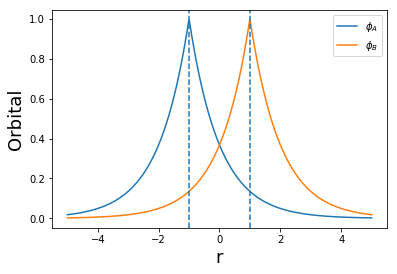

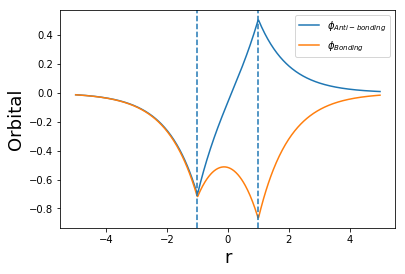

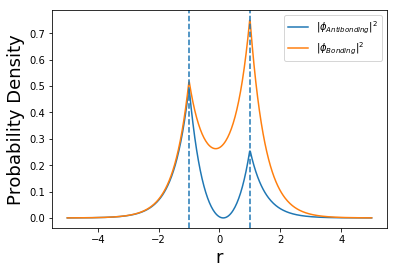

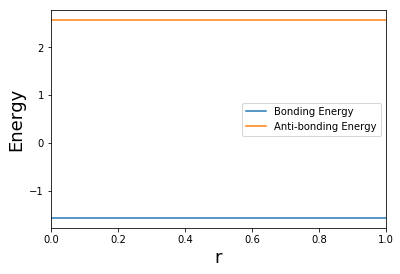

In [42]:
import numpy as np 
from numpy import linalg as LA
import matplotlib.pyplot as plt

###############################
## Hamiltonian of the system ##
###############################
H=np.array([[0,2],[2,1]])

print(H)

################################
## Eigenvalue and Eigenvector ##
################################
w,v =LA.eig(H)

################################
print(w)
print(v)

#################################
#################################
#plt.axhline(w[0],0,1,label='Bonding')
#plt.axhline(w[1],0,1,label='Anti-bonding')
#plt.ylabel('Energy(eV)')
#plt.show()


###########################################
###########################################
## Define the form of Localised Orbital  ##
###########################################
###########################################
def phi(r, r0, aB):
    return np.exp(-abs(r-r0)/aB)

######################################################
######################################################
#     Creat the blank array to store the eigenvalue  #                               
######################################################
######################################################
phiAVec=[]
phiBVec=[]
phiAB_ABVec=[]
phiAB_BVec=[]

######################################################
######################################################
#     Position of the Localised Orbitals             #
######################################################
######################################################
r0A=-1     # Position of A atom 
r0B=1      # Position of the B atom
aB=1       # constant

x=np.linspace(-5,5,500)
for r in x:
    phiAVec.append(phi(r, r0A, aB))
    phiBVec.append(phi(r, r0B, aB))
    phiAB_AB=v[0,0]*phi(r,r0A, aB)+v[1,0]*phi(r,r0B, aB)
    phiAB_B=v[0,1]*phi(r,r0A, aB)+v[1,1]*phi(r,r0B, aB)
    phiAB_ABVec.append(phiAB_AB)
    phiAB_BVec.append(phiAB_B)

#########################################    
#########################################    
##### Plotting the Localised orbital   ##    
#########################################
#########################################
plt.figure()
plt.plot(x,phiAVec,label="$\phi_A$")
plt.plot(x,phiBVec,label="$\phi_B$")
plt.axvline(x=-1,linestyle='--')
plt.axvline(x=1,linestyle='--')
plt.xlabel('r',fontsize=18)
plt.ylabel('Orbital',fontsize=18)
plt.legend()
#################################
#### Plotting the Eigenvector ###
#################################
plt.figure()
plt.plot(x,phiAB_ABVec,label="$\phi_{Anti-bonding}$")
plt.plot(x,phiAB_BVec,label="$\phi_{Bonding}$")
plt.axvline(x=-1,linestyle='--')
plt.axvline(x=1,linestyle='--')
plt.xlabel('r',fontsize=18)
plt.ylabel('Orbital',fontsize=18)
plt.legend()
#################################
#################################
####  Probability density      ##
#################################
#################################
plt.figure()
plt.plot(x,[i ** 2 for i in phiAB_ABVec],label="$|\phi_{Antibonding}|^2$")
plt.plot(x,[i ** 2 for i in phiAB_BVec], label="$|\phi_{Bonding}|^2 $")
plt.axvline(x=-1,linestyle='--')
plt.axvline(x=1,linestyle='--')
plt.xlabel('r',fontsize=18)
plt.ylabel('Probability Density',fontsize=18)
plt.legend()

########################################
########################################
##   Bonding and Antibonding Energy  ###
########################################
########################################

plt.figure()
plt.axhline(w[0],0,1,color="C0",label="Bonding Energy")
plt.axhline(w[1],0,1,color="C1",label="Anti-bonding Energy")
plt.xlabel('r',fontsize=18)
plt.ylabel('Energy',fontsize=18)
plt.legend()



$ {\bf Problem \,\, 3.}$ Consider an extension of the previous problem for a linear 
chain of three atoms with site energies $E_i=0~$eV. The interatomic hopping parameter 
is $t=2~$eV. (a) Write the code to build the Hamiltonian matrix, then obtain the 
eigenvectors and eigenvalues. (b) What is the relationship between $t$ and the
resulting energy levels? (c) Discuss the character of the molecular orbital wave 
functions depending on the eigenvalue energies. (d) Repeat the same exercise when the
triatomic molecules form a closed triangle and an electron can succesively hop from one
site to the neighboring site.

[[0 2 0]
 [2 0 2]
 [0 2 0]]
[-2.82842712e+00  1.95590072e-16  2.82842712e+00]
[[ 5.00000000e-01  7.07106781e-01  5.00000000e-01]
 [-7.07106781e-01  9.02056208e-17  7.07106781e-01]
 [ 5.00000000e-01 -7.07106781e-01  5.00000000e-01]]


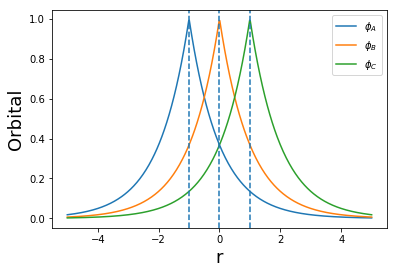

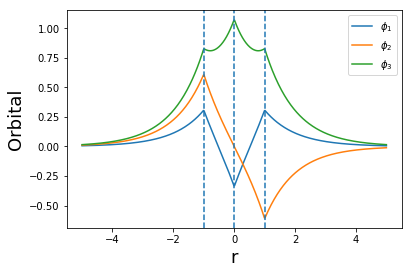

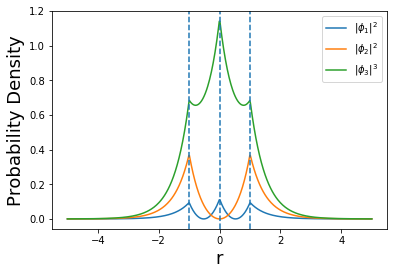

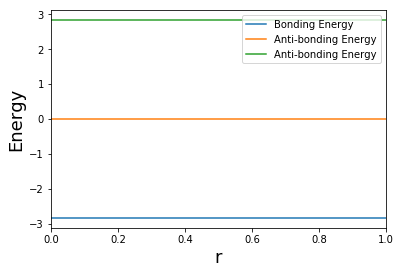

In [58]:
################################################
################################################
######## Linear Chain of Three Atom ############
################################################
################################################

import numpy as np 
from numpy import linalg as LA
import matplotlib.pyplot as plt

###############################
## Hamiltonian of the system ##
###############################
H=np.array([[0,2,0],[2,0,2],[0,2,0]])

print(H)

################################
################################
## Eigenvalue and Eigenvector ##
################################
################################

w,v =LA.eig(H)

################################
################################
print(w)
print(v)
#################################
#################################


###########################################
## Define the form of Localised Orbital  ##
###########################################

def phi(r, r0, aB):
    return np.exp(-abs(r-r0)/aB)

######################################################
######################################################
#     Creat the blank array to store the eigenvalue  #                               
######################################################
######################################################
phiAVec=[]
phiBVec=[]
phiCVec=[]

phiAB_1Vec=[]
phiAB_2Vec=[]
phiAB_3Vec=[]

######################################################
######################################################
#     Position of the Localised Orbitals             #
######################################################
######################################################
r0A=-1     # Position of A atom 
r0B=0      # Position of B atom
r0C=1      # Position of C atom  

aB=1       # Constant  

x=np.linspace(-5,5,500)
for r in x:
    phiAVec.append(phi(r, r0A, aB))
    phiBVec.append(phi(r, r0B, aB))
    phiCVec.append(phi(r, r0C, aB))
    
#########################################    
    phiAB_1=v[0,0]*phi(r,r0A, aB)+v[1,0]*phi(r,r0B, aB)+v[2,0]*phi(r,r0C,aB)
    phiAB_2=v[0,1]*phi(r,r0A, aB)+v[1,1]*phi(r,r0B, aB)+v[2,1]*phi(r,r0C,aB)
    phiAB_3=v[0,2]*phi(r,r0A, aB)+v[1,2]*phi(r,r0B, aB)+v[2,2]*phi(r,r0C,aB)
    
#########################################    
    phiAB_1Vec.append(phiAB_1)
    phiAB_2Vec.append(phiAB_2)
    phiAB_3Vec.append(phiAB_3)
    
#########################################    
#########################################    
##### Plotting the Localised orbital   ##    
#########################################
#########################################
plt.figure()
plt.plot(x,phiAVec,label="$\phi_A$")
plt.plot(x,phiBVec,label="$\phi_B$")
plt.plot(x,phiCVec,label="$\phi_C$")


plt.axvline(x=-1,linestyle='--')
plt.axvline(x=0,linestyle='--')
plt.axvline(x=1,linestyle='--')

plt.xlabel('r',fontsize=18)
plt.ylabel('Orbital',fontsize=18)
plt.legend()


#################################
#### Plotting the Eigenvector ###
#################################
plt.figure()
plt.plot(x,phiAB_1Vec,label="$\phi_1$")
plt.plot(x,phiAB_2Vec,label="$\phi_2$")
plt.plot(x,phiAB_3Vec,label="$\phi_3$")

plt.axvline(x=-1,linestyle='--')
plt.axvline(x=0,linestyle='--')
plt.axvline(x=1,linestyle='--')
plt.xlabel('r',fontsize=18      )
plt.ylabel('Orbital',fontsize=18)
plt.legend()
#################################
#################################
####  Probability density      ##
#################################
#################################
plt.figure()
plt.plot(x,[i ** 2 for i in phiAB_1Vec],label="$|\phi_1|^2$")
plt.plot(x,[i ** 2 for i in phiAB_2Vec],label="$|\phi_2|^2$")
plt.plot(x,[i ** 2 for i in phiAB_3Vec],label="$|\phi_3|^3$")

plt.axvline(x=-1,linestyle='--')
plt.axvline(x=0,linestyle='--')
plt.axvline(x=1,linestyle='--')


plt.xlabel('r',fontsize=18)
plt.ylabel('Probability Density',fontsize=18)
plt.legend()

########################################
########################################
##   Bonding and Antibonding Energy  ###
########################################
########################################

plt.figure()
plt.axhline(w[0],0,1,color="C0",label="Bonding Energy")
plt.axhline(w[1],0,1,color="C1",label="Anti-bonding Energy")
plt.axhline(w[2],0,1,color="C2",label="Anti-bonding Energy")

plt.xlabel('r',fontsize=18)
plt.ylabel('Energy',fontsize=18)
plt.legend()



[[0 2 2]
 [2 0 2]
 [2 2 0]]
[-2.  4. -2.]
[[-0.81649658  0.57735027  0.22645541]
 [ 0.40824829  0.57735027 -0.79259392]
 [ 0.40824829  0.57735027  0.56613852]]


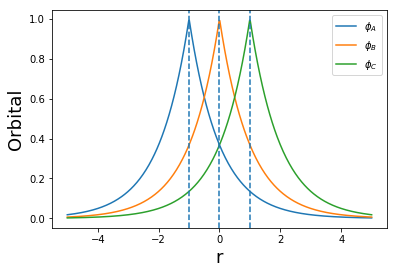

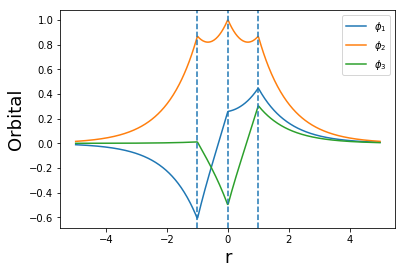

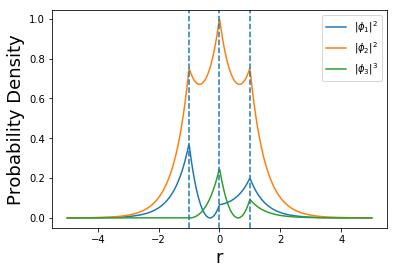

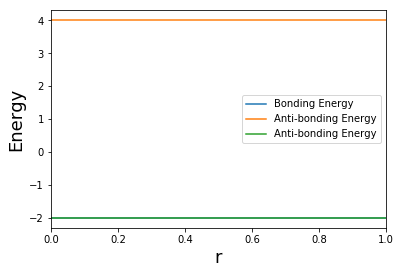

In [169]:
##################################################
##################################################
#### Triatomic Molecule in close Traingle  ######
##################################################
##################################################
import numpy as np 
from numpy import linalg as LA
import matplotlib.pyplot as plt
###############################
## Hamiltonian of the system ##
###############################
H=np.array([[0,2,2],[2,0,2],[2,2,0]])
print(H)
################################
## Eigenvalue and Eigenvector ##
################################
w,v =LA.eig(H)
################################
################################
print(w)
print(v)
################################
################################
###########################################
## Define the form of Localised Orbital  ##
###########################################
def phi(r, r0, aB):
    return np.exp(-abs(r-r0)/aB)
######################################################
######################################################
#     Creat the blank array to store the eigenvalue  #                               
######################################################
######################################################
phiAVec=[]
phiBVec=[]
phiCVec=[]
phiAB_1Vec=[]
phiAB_2Vec=[]
phiAB_3Vec=[]
######################################################
######################################################
#     Position of the Localised Orbitals             #
######################################################
######################################################
r0A=-1     # Position of A atom 
r0B=0      # Position of B atom
r0C=1      # Position of C atom  
aB=1       # Constant  
x=np.linspace(-5,5,500)
for r in x:
    phiAVec.append(phi(r, r0A, aB))
    phiBVec.append(phi(r, r0B, aB))
    phiCVec.append(phi(r, r0C, aB))  
#########################################    
    phiAB_1=v[0,0]*phi(r,r0A, aB)+v[1,0]*phi(r,r0B, aB)+v[2,0]*phi(r,r0C,aB)
    phiAB_2=v[0,1]*phi(r,r0A, aB)+v[1,1]*phi(r,r0B, aB)+v[2,1]*phi(r,r0C,aB)
    phiAB_3=v[0,2]*phi(r,r0A, aB)+v[1,2]*phi(r,r0B, aB)+v[2,2]*phi(r,r0C,aB)   
#########################################    
    phiAB_1Vec.append(phiAB_1)
    phiAB_2Vec.append(phiAB_2)
    phiAB_3Vec.append(phiAB_3)
#########################################    
##### Plotting the Localised orbital   ##    
#########################################
plt.figure()
plt.plot(x,phiAVec,label="$\phi_A$")
plt.plot(x,phiBVec,label="$\phi_B$")
plt.plot(x,phiCVec,label="$\phi_C$")
plt.axvline(x=-1,linestyle='--')
plt.axvline(x=0,linestyle='--')
plt.axvline(x=1,linestyle='--')

plt.xlabel('r',fontsize=18)
plt.ylabel('Orbital',fontsize=18)
plt.legend()


#################################
#### Plotting the Eigenvector ###
#################################
plt.figure()
plt.plot(x,phiAB_1Vec,label="$\phi_1$")
plt.plot(x,phiAB_2Vec,label="$\phi_2$")
plt.plot(x,phiAB_3Vec,label="$\phi_3$")

plt.axvline(x=-1,linestyle='--')
plt.axvline(x=0,linestyle='--')
plt.axvline(x=1,linestyle='--')
plt.xlabel('r',fontsize=18      )
plt.ylabel('Orbital',fontsize=18)
plt.legend()
#################################
#################################
####  Probability density      ##
#################################
#################################
plt.figure()
plt.plot(x,[i ** 2 for i in phiAB_1Vec],label="$|\phi_1|^2$")
plt.plot(x,[i ** 2 for i in phiAB_2Vec],label="$|\phi_2|^2$")
plt.plot(x,[i ** 2 for i in phiAB_3Vec],label="$|\phi_3|^3$")

plt.axvline(x=-1,linestyle='--')
plt.axvline(x=0,linestyle='--')
plt.axvline(x=1,linestyle='--')


plt.xlabel('r',fontsize=18)
plt.ylabel('Probability Density',fontsize=18)
plt.legend()

########################################
########################################
##   Bonding and Antibonding Energy  ###
########################################
########################################

plt.figure()
plt.axhline(w[0],0,1,color="C0",label="Bonding Energy")
plt.axhline(w[1],0,1,color="C1",label="Anti-bonding Energy")
plt.axhline(w[2],0,1,color="C2",label="Anti-bonding Energy")

plt.xlabel('r',fontsize=18)
plt.ylabel('Energy',fontsize=18)
plt.legend()

${\bf Problem \,\, 4.}$ (a) Use python to obtain the eigenenergy spectrum as a 
function of $N$ for a linear chain of $N$-atoms ranging from 2 to 100. The site 
energies are $E_0=0$ and interatomic hopping energy of $t=1~$eV. (b) Compare your
plot against Fig. 2a in the paper by Analytis uploaded in piazza. (c) When do we 
get an eigenenergy of zero? (d) What is the maximum and minimum value of the eigenenergies?

Text(0,0.5,'Energy')

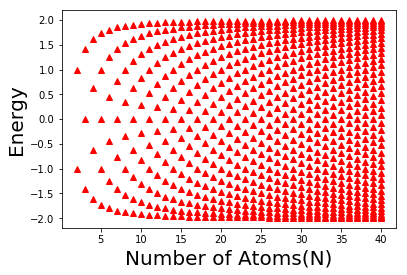

In [354]:
############################################################
############################################################
##       Hamiltonian for linear chain of N=2-->40  atoms  ##
############################################################
############################################################
import numpy as np 
from numpy import linalg as LA
import matplotlib.pyplot as plt
r=np.arange(2,41)               # Array to store the number of atoms N=2-->40
EVAL=[]                         # Blank array to store the eigen energy for different N
for i in r:
    t=1                         # Hopping energy in eV.
    N=i                         # Total Number of Atoms. 
    H=np.zeros((N,N))           # Blank Hamiltonian for store the elements.
###################################
#### Construct the Hamiltonian ####
###################################   
    for i in range (0,N-1):      
        H[i,i+1]=t                  
        H[i+1,i]=t               
###################################################        
##### Calculate the Eigenvalue and Eigenvector ####
###################################################
    w,v =LA.eig(H)
    EVAL.append(w)
#########################################
##  Energy Spectrum plot               ## 
#########################################
plt.figure()
k=len(EVAL)                 #Total number of eigenvalue.
n=2.0
for i in range(0,k):
    m=len(EVAL[i])          #Total number of eigenvalue for a particular N.
    N=np.linspace(n,n+1,1)  
    for j in range(0,m):    
              for n in N:
                 plt.plot(n,EVAL[i][j],'r^')
    n=n+1
plt.xlabel('Number of Atoms(N)',fontsize=20)
plt.ylabel('Energy',fontsize=20)   

# 4c)

When the number of atoms is odd like 3,5,7,9,11....the eigen value gives zero energy
state.

# 4d)

The maximum value of eigen energy=2t = 2 eV
The minimum value of eigen energy=-2t=-2 eV

${\bf Problem \,\,5.}$ Using python build the Hamiltonian of a 16 atoms
molecule consisting of 4 columns and 4 rows in a regular square array. 
Consider that interatomic hopping of $t=-2~$eV exists only along the horizontal 
or vertical directions. (a) Represent the Hamiltonian matrix and (b) plot 
associated energy spectrum.

Total Number of Atom= 16
Hopping energy of neighbour site= -2
The Hamiltonian:
H=
[[ 0. -2.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [-2.  0. -2.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0. -2.  0. -2.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0. -2.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0. -2.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0. -2.  0. -2.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0. -2.  0. -2.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0. -2.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0. -2.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0. -2.  0. -2.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0. -2.  0. -2.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0. -2.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0. -2.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  

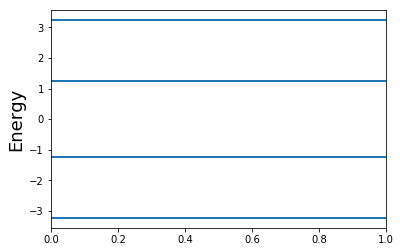

In [173]:
################################################
################################################
##                                             #
################################################
################################################

import numpy as np 
from numpy import linalg as LA
import matplotlib.pyplot as plt

N=16    # Total number of Atoms
print('Total Number of Atom=',N)

t=-2    # hopping energy in eV

print('Hopping energy of neighbour site=',t)

#### Initiation of the Hamiltonian ####
H=np.zeros((N,N))

###################################
#### Construct the Hamiltonian ####
###################################
for i in range (1,N):
    if (i/4==int(i/4)):
        H[i,i+1]=0
        H[i+1,i]=0
    else:
        H[i-1,i]=t
        H[i,i-1]=t

print('The Hamiltonian:')
print('H=')
print(H)

##############################################
##############################################
######### Energy Spectrum Calculation ########
##############################################
##############################################

w,v =LA.eig(H)  # Solving the Hamiltonian 
                # w=Eigen Value 
                # v=Eigen Vector
print('Eigen Value of the system:')
print(w)
#print(v)

plt.figure()
for i in range (0,N):
    plt.axhline(w[i],0,1)
    plt.ylabel('Energy',fontsize=18)
plt.show()